<a href="https://colab.research.google.com/github/lindseyrich2/DS340-Project/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/brianellis1997/Sarcasm_Detection.git

fatal: destination path 'Sarcasm_Detection' already exists and is not an empty directory.


#Expirimentation with CNN Architecture for Sarcasm Detection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
train_bal = pd.read_csv('/content/drive/MyDrive/Sarcasm_Data/train_bal_2.csv')

In [4]:
train_bal

,Unnamed: 0,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,exclamation_count,questionmark_count,period_count,space_count,slash_count,elips_count,capital_letters_count,word_count,total_punctuation
0,522142,0,"I personally wasn't a huge Garrosh fan, I've a...",cromemako83,AskReddit,2,2,0,2015-07-01,2015-07-11 01:55:53,Fuck Vol'jin. Garrosh Hellscream did nothing w...,0,0,1,0,0,0,5,14,4
1,907864,1,you forgot the,_SharkWeek_,AskReddit,1,1,0,2013-03-01,2013-03-14 03:03:46,That's a lie fed to you by the LIEberal media....,0,0,0,0,0,0,0,3,0
2,604170,1,"Nah man, she's clearly an ad carry",jdswift13,leagueoflegends,1,1,0,2015-10-01,2015-10-21 23:22:17,she isnt already?,0,0,0,0,0,0,1,7,2
3,110635,1,This sub in a nutshell.,trickz-M-,GlobalOffensive,1,-1,-1,2016-12-01,2016-12-05 03:50:18,Cloud 9 Qualify! (ONLY C9 FANS ALLOWED(,0,0,1,0,0,0,1,5,1
4,997758,0,Yes... I do.,guriboysf,videos,4,4,0,2010-01-01,2010-01-17 21:32:40,"""so, i hear you have a fat cock.""",0,0,4,0,0,0,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808613,368312,1,"Yeah, all asians are smart, right?",est1roth,europe,2,2,0,2016-04-01,2016-04-17 00:05:51,"Well if an asian woman says it, it must be true.",0,1,0,0,0,0,1,6,3
808614,541588,1,Nah I was serious,SrrBrrGrr,funny,-5,-5,0,2015-08-01,2015-08-11 23:15:11,I don't think people understand you were jokin...,0,0,0,0,0,0,2,4,0
808615,833824,0,you are assuming way too much there is no liab...,cqm,blog,1,1,0,2014-09-01,2014-09-30 21:44:06,They're not saying it is easy. In fact they we...,0,0,0,0,0,0,0,41,6
808616,55102,1,But Planned Parenthood is the devil and must b...,DrScientist812,worldnews,3,3,0,2016-09-01,2016-09-06 12:40:25,Fall in ovarian cancer deaths worldwide linked...,1,0,0,0,0,0,3,13,1


In [5]:
y = train_bal['label']
X = train_bal.drop(columns=['label'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:
X_test, X_eval, y_test, y_eval = train_test_split(X, y, test_size=0.2, random_state=3)

#Preparing train data

In [7]:
X_text = X_train[['comment', 'parent_comment']]
X_numeric = X_train[['word_count', 'capital_letters_count', 'total_punctuation']]

In [8]:
max_words = 10000  # Maximum number of words to keep based on word frequency
max_seq_length = 100  # Maximum length of sequences

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, concatenate, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

tokenizer = Tokenizer(num_words=max_words, lower=False)
tokenizer.fit_on_texts(X_text['comment'] + ' ' + X_text['parent_comment'])

***Possibly tokenize differenlty for comment and parent comment****

In [10]:
X_text_comment_seq = tokenizer.texts_to_sequences(X_text['comment'])
X_text_parent_comment_seq = tokenizer.texts_to_sequences(X_text['parent_comment'])

In [11]:
X_text_comment_pad = pad_sequences(X_text_comment_seq, maxlen=max_seq_length)
X_text_parent_comment_pad = pad_sequences(X_text_parent_comment_seq, maxlen=max_seq_length)

In [12]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

#Word2vec model trained on our text data

In [13]:
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
word2vec = gensim.models.Word2Vec.load('/content/drive/MyDrive/Sarcasm_Data/word2vec.model')

In [14]:
# from gensim.models import Word2Vec

# word_index = {word: idx for idx, word in enumerate(word2vec.wv.index_to_key, start=1)}


In [15]:
import numpy as np
from keras.layers import Embedding

# # Assume word2vec is your pre-trained Word2Vec model
# # Assume word_index is a dictionary mapping from word to integer index
# # Assume max_words is the size of your vocabulary, and word2vec.vector_size is the size of each word vector


# # max_words = len(word_index) + 1  # Adjust based on whether you start indexing from 0 or 1

# # Initialize the embedding matrix
# embedding_matrix = np.zeros((max_words, embedding_dim))

# # # Populate the embedding matrix
# # for word, i in word_index.items():
# #     if i < max_words:
# #         if word in word2vec.wv:
# #             # Words not found in the embedding index will be all zeros
# #             embedding_matrix[i] = word2vec.wv[word]



In [16]:
# Initialize the embedding matrix
embedding_dim = word2vec.vector_size
embedding_matrix = np.zeros((max_words, embedding_dim))

# Populate the embedding matrix using the tokenizer's word_index
for word, i in tokenizer.word_index.items():
    if i < max_words:  # Ensure you don't exceed the max_words limit
        if word in word2vec.wv:
            embedding_matrix[i] = word2vec.wv[word]


In [17]:
embedding_dim

150

#Preparing Test Data

In [18]:
X_text_test = X_test[['comment', 'parent_comment']]
X_numeric_test = X_test[['word_count', 'capital_letters_count', 'total_punctuation']]

In [19]:
X_text_comment_seq_test = tokenizer.texts_to_sequences(X_text_test['comment'])
X_text_parent_comment_seq_test = tokenizer.texts_to_sequences(X_text_test['parent_comment'])

In [20]:
X_text_comment_pad_test = pad_sequences(X_text_comment_seq_test, maxlen=max_seq_length)
X_text_parent_comment_pad_test = pad_sequences(X_text_parent_comment_seq_test, maxlen=max_seq_length)

In [21]:
scaler = StandardScaler()
X_numeric_scaled_test = scaler.fit_transform(X_numeric_test)

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


##CNN Text Covariates

In [ ]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout, Bidirectional, LSTM
from keras.models import Model
from keras import optimizers
from kerastuner import HyperModel

def build_model1(hp):
    comment_input = Input(shape=(max_seq_length,), name='comment_input')
    parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')

    embedding_layer = Embedding(input_dim=max_words,
                                output_dim=150,
                                weights=[embedding_matrix],
                                input_length=max_seq_length,
                                trainable=True)

    comment_embedding = embedding_layer(comment_input)
    parent_comment_embedding = embedding_layer(parent_comment_input)

    concatenated_embeddings = concatenate([comment_embedding, parent_comment_embedding], axis=1)

    conv1 = Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Choice('conv1_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(concatenated_embeddings)
    conv1 = MaxPooling1D(pool_size=2)(conv1)

    conv2 = Conv1D(filters=hp.Int('conv2_filters', min_value=32, max_value=64, step=32),
                   kernel_size=hp.Choice('conv2_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(conv1)
    conv2 = MaxPooling1D(pool_size=2)(conv2)


    flattened = Flatten()(conv2)
    flattened = Dropout(0.5)(flattened)

    dense = Dense(hp.Int('dense_units', min_value=64, max_value=128, step=32), activation='relu')(flattened)
    output = Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=[comment_input, parent_comment_input], outputs=output)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

<ipython-input-25-b6b6469138e8>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [ ]:
# from kerastuner.tuners import RandomSearch

# tuner1 = RandomSearch(
#     build_model1,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='hparam_tuning'
# )

# tuner1.search_space_summary()

# tuner1.search(x=[X_text_comment_pad, X_text_parent_comment_pad],
#              y=y_train,
#              epochs=4,
#              batch_size=128,
#              validation_split=0.10)



# CNN_Text = tuner1.get_best_models(num_models=1)[0]

In [ ]:
# CNN_Text.save('/content/drive/MyDrive/Sarcasm_Data/CNN_Text.h5')

In [ ]:
from tensorflow.keras.models import load_model
CNN_Text = load_model('/content/drive/MyDrive/Sarcasm_Data/CNN_Text.h5')

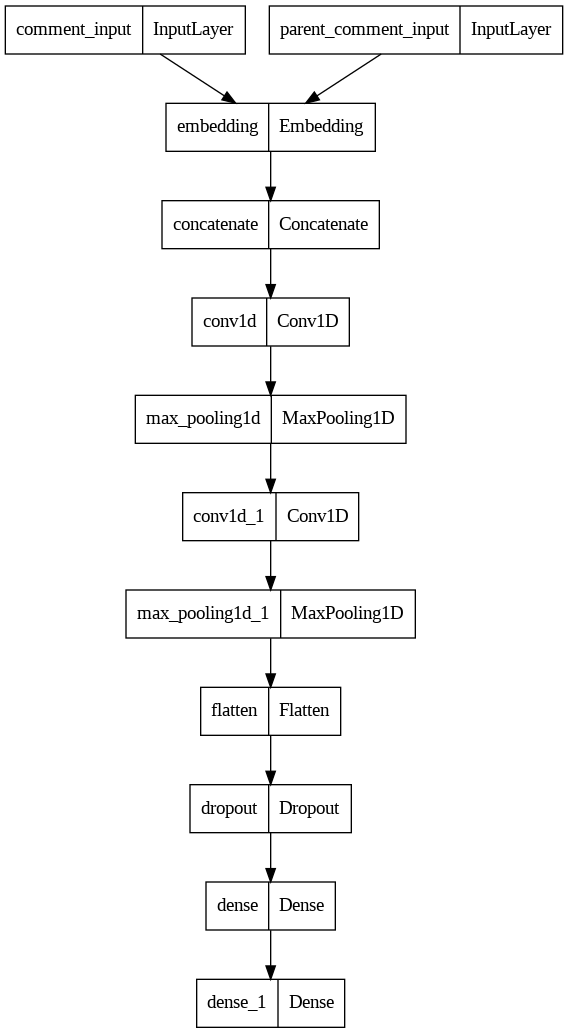

In [ ]:
plot_model(CNN_Text)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model

predictions = CNN_Text.predict({'comment_input': X_text_comment_pad_test,
                             'parent_comment_input': X_text_parent_comment_pad_test})

prediction_result = (predictions > 0.5).astype('int32')

accuracy = accuracy_score(y_test, prediction_result)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_test, prediction_result)
print('Precision: %f' % precision)


recall = recall_score(y_test, prediction_result)
print('Recall: %f' % recall)


f1 = f1_score(y_test, prediction_result)
print('F1 score: %f' % f1)


predictions = predictions.flatten()
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)

5054/5054 [==============================] - 10s 2ms/step
Accuracy: 0.721136
Precision: 0.746038
Recall: 0.672866
F1 score: 0.707565
ROC AUC: 0.795853


#CNN Text and Non-Text Covariates

In [ ]:
import keras_tuner as kt
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers

def build_model2(hp):
    comment_input = Input(shape=(max_seq_length,), name='comment_input')
    parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')
    numeric_input = Input(shape=(X_numeric_scaled.shape[1],), name='numeric_input')

    embedding_layer = Embedding(input_dim=max_words,
                                output_dim=150,
                                weights=[embedding_matrix],
                                input_length=max_seq_length,
                                trainable=True)

    comment_embedding = embedding_layer(comment_input)
    parent_comment_embedding = embedding_layer(parent_comment_input)

    concatenated_embeddings = concatenate([comment_embedding, parent_comment_embedding], axis=1)

    conv1 = Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Choice('conv1_kernel_size', values=[3, 5, 7]),
                   padding='same',
                   activation='relu')(concatenated_embeddings)
    conv1 = MaxPooling1D(pool_size=2)(conv1)

    conv2 = Conv1D(filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Choice('conv2_kernel_size', values=[3, 5, 7]),
                   padding='same',
                   activation='relu')(conv1)
    conv2 = MaxPooling1D(pool_size=2)(conv2)

    flattened = Flatten()(conv2)
    flattened = Dropout(0.5)(flattened)

    numeric_dense = Dense(hp.Int('numeric_dense_units', min_value=32, max_value=128, step=32), activation='relu')(numeric_input)
    numeric_dense = Dropout(0.5)(numeric_dense)
    numeric_dense = Dense(hp.Int('numeric_dense_units2', min_value=16, max_value=64, step=16), activation='relu')(numeric_dense)

    concatenated_final = concatenate([flattened, numeric_dense], axis=-1)

    dense1 = Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')(concatenated_final)
    dense1 = Dropout(0.5)(dense1)
    output = Dense(1, activation='sigmoid')(dense1)

    model2 = Model(inputs=[comment_input, parent_comment_input, numeric_input], outputs=output)
    model2.compile(optimizer=optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model2


In [ ]:
# from kerastuner.tuners import RandomSearch

# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# tuner2 = RandomSearch(
#     build_model2,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='hparam_tuning2'
# )

# tuner2.search_space_summary()

# tuner2.search(x=[X_text_comment_pad, X_text_parent_comment_pad, X_numeric_scaled],
#              y=y_train,
#              epochs=4,
#              batch_size=128,
#              validation_split=0.10,
#              callbacks=[early_stopping])



# CNN_Text_NonText = tuner2.get_best_models(num_models=1)[0]

In [ ]:
# CNN_Text_NonText.save('/content/drive/MyDrive/Sarcasm_Data/CNN_Text_NonText.h5')

In [ ]:
from tensorflow.keras.models import load_model
CNN_Text_NonText = load_model('/content/drive/MyDrive/Sarcasm_Data/CNN_Text_NonText.h5')

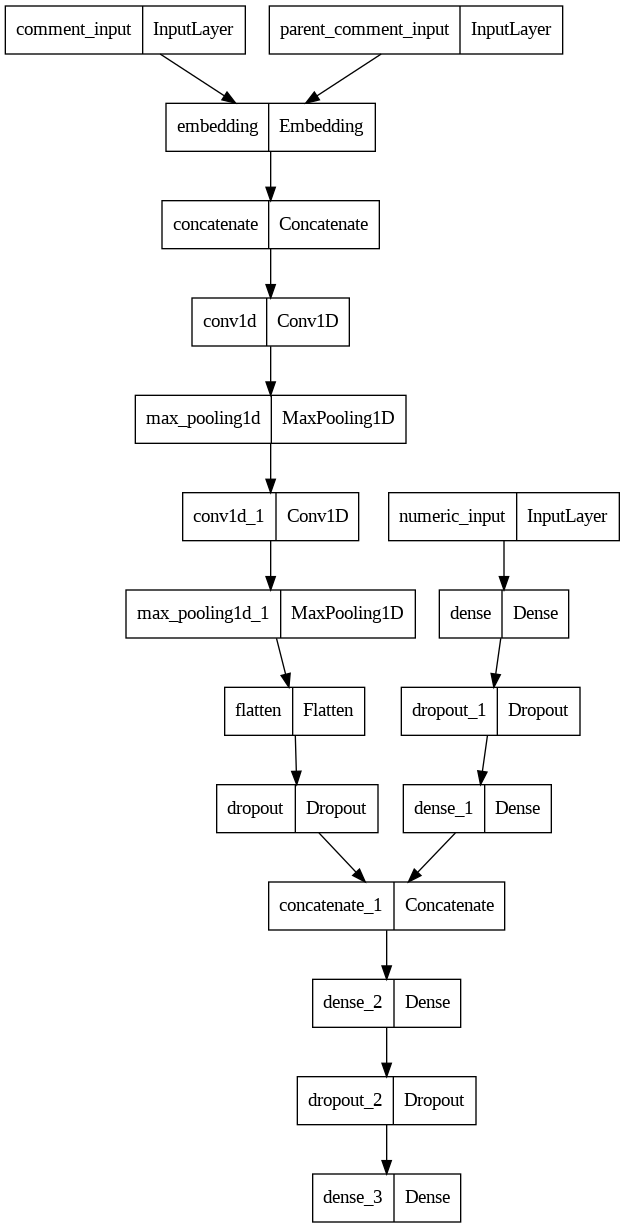

In [ ]:
plot_model(CNN_Text_NonText)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model

predictions = CNN_Text_NonText.predict({'comment_input': X_text_comment_pad_test,
                             'parent_comment_input': X_text_parent_comment_pad_test,
                                               'numeric_input': X_numeric_scaled_test})

prediction_result = (predictions > 0.5).astype('int32')

accuracy = accuracy_score(y_test, prediction_result)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_test, prediction_result)
print('Precision: %f' % precision)


recall = recall_score(y_test, prediction_result)
print('Recall: %f' % recall)


f1 = f1_score(y_test, prediction_result)
print('F1 score: %f' % f1)


predictions = predictions.flatten()
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)

5054/5054 [==============================] - 10s 2ms/step
Accuracy: 0.706939
Precision: 0.703948
Recall: 0.717066
F1 score: 0.710446
ROC AUC: 0.784221


#CNN with BiLSTM Text and Non-Text Covariates

In [ ]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout, Bidirectional, LSTM
from keras.models import Model
from keras import optimizers
import keras_tuner as kt

def build_model3(hp):
    comment_input = Input(shape=(max_seq_length,), name='comment_input')
    parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')
    numeric_input = Input(shape=(X_numeric_scaled.shape[1],), name='numeric_input')

    embedding_layer = Embedding(input_dim=max_words,
                                output_dim=150,
                                weights=[embedding_matrix],
                                input_length=max_seq_length,
                                trainable=True)

    comment_embedding = embedding_layer(comment_input)
    parent_comment_embedding = embedding_layer(parent_comment_input)

    concatenated_embeddings = concatenate([comment_embedding, parent_comment_embedding], axis=1)

    conv1 = Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                   kernel_size=5,
                   padding='same',
                   activation='relu')(concatenated_embeddings)
    conv1 = MaxPooling1D(pool_size=2)(conv1)

    conv2 = Conv1D(filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
                   kernel_size=3,
                   padding='same',
                   activation='relu')(conv1)
    conv2 = MaxPooling1D(pool_size=2)(conv2)

    bi_lstm = Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32)))(conv2)
    bi_lstm = Dropout(0.5)(bi_lstm)

    numeric_dense = Dense(64, activation='relu')(numeric_input)
    numeric_dense = Dropout(0.5)(numeric_dense)
    numeric_dense = Dense(32, activation='relu')(numeric_dense)

    concatenated_final = concatenate([bi_lstm, numeric_dense], axis=-1)

    dense1 = Dense(hp.Int('dense1_units', min_value=32, max_value=128, step=32), activation='relu')(concatenated_final)
    dense1 = Dropout(0.5)(dense1)
    output = Dense(1, activation='sigmoid')(dense1)

    model3 = Model(inputs=[comment_input, parent_comment_input, numeric_input], outputs=output)
    model3.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model3



In [ ]:
from kerastuner.tuners import RandomSearch

early_stopping3 = EarlyStopping(monitor='val_loss', patience=5)

tuner3 = RandomSearch(
    build_model3,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hparam_tuning3'
)

tuner3.search_space_summary()

tuner3.search(x=[X_text_comment_pad, X_text_parent_comment_pad, X_numeric_scaled],
             y=y_train,
             epochs=4,
             batch_size=128,
             validation_split=0.10,
             callbacks=[early_stopping3])



CNN_Text_NonText_BiLSTM = tuner3.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 05m 09s]
val_accuracy: 0.557056725025177

Best val_accuracy So Far: 0.7246096730232239
Total elapsed time: 00h 26m 58s


In [ ]:
# CNN_Text_NonText_BiLSTM.save('/content/drive/MyDrive/Sarcasm_Data/CNN_Text_NonText_BiLSTM.h5')

In [ ]:
from tensorflow.keras.models import load_model
CNN_Text_NonText_BiLSTM = load_model('/content/drive/MyDrive/Sarcasm_Data/CNN_Text_NonText_BiLSTM.h5')

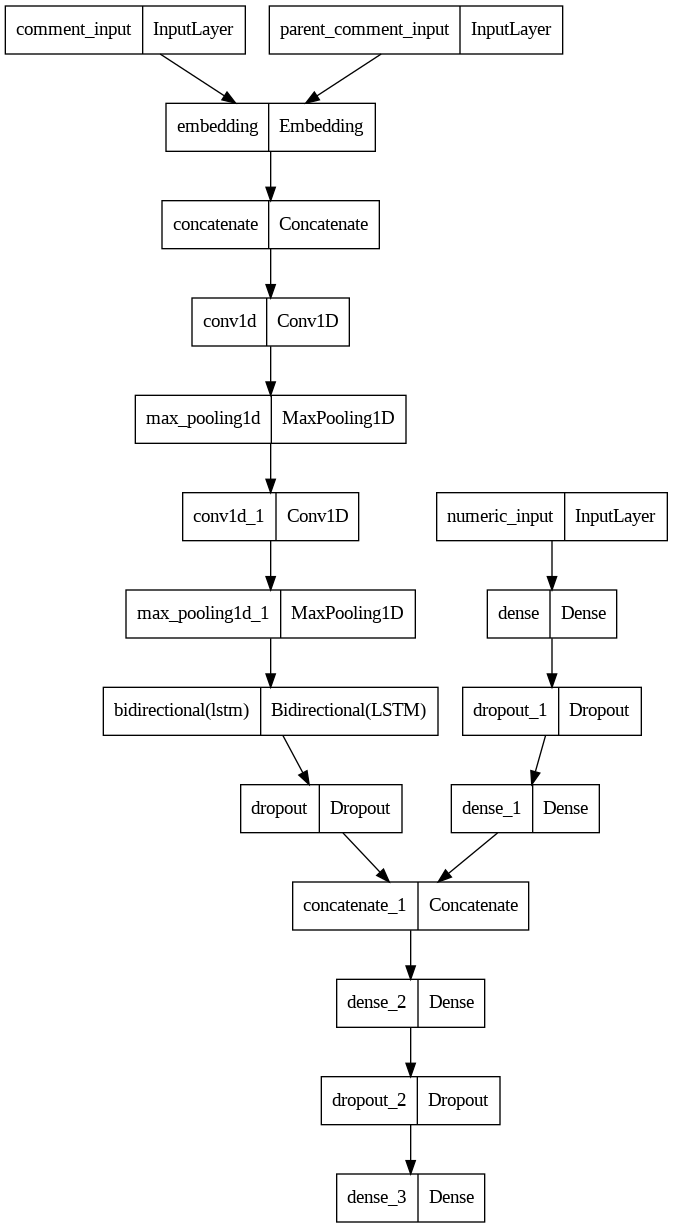

In [ ]:
plot_model(CNN_Text_NonText_BiLSTM)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model

predictions = CNN_Text_NonText_BiLSTM.predict({'comment_input': X_text_comment_pad_test,
                             'parent_comment_input': X_text_parent_comment_pad_test,
                                               'numeric_input': X_numeric_scaled_test})

prediction_result = (predictions > 0.5).astype('int32')

accuracy = accuracy_score(y_test, prediction_result)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_test, prediction_result)
print('Precision: %f' % precision)


recall = recall_score(y_test, prediction_result)
print('Recall: %f' % recall)


f1 = f1_score(y_test, prediction_result)
print('F1 score: %f' % f1)


predictions = predictions.flatten()
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)

5054/5054 [==============================] - 19s 4ms/step
Accuracy: 0.690609
Precision: 0.662559
Recall: 0.780369
F1 score: 0.716654
ROC AUC: 0.779783


#CNN with BiLSTM Text Only


In [ ]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout, Bidirectional, LSTM
from keras.models import Model
from keras import optimizers
from keras_tuner import HyperModel

def build_model4(hp):
    comment_input = Input(shape=(max_seq_length,), name='comment_input')
    parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')

    embedding_layer = Embedding(input_dim=max_words,
                                output_dim=150,
                                weights=[embedding_matrix],
                                input_length=max_seq_length,
                                trainable=True)

    comment_embedding = embedding_layer(comment_input)
    parent_comment_embedding = embedding_layer(parent_comment_input)

    concatenated_embeddings = concatenate([comment_embedding, parent_comment_embedding], axis=1)

    conv1 = Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Choice('conv1_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(concatenated_embeddings)
    conv1 = MaxPooling1D(pool_size=2)(conv1)

    conv2 = Conv1D(filters=hp.Int('conv2_filters', min_value=32, max_value=64, step=32),
                   kernel_size=hp.Choice('conv2_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(conv1)
    conv2 = MaxPooling1D(pool_size=2)(conv2)

    bi_lstm = Bidirectional(LSTM(hp.Int('lstm_units', min_value=64, max_value=256, step=64)))(conv2)

    # Because we've added a Bi-LSTM layer, we no longer need to flatten the conv2 output
    bi_lstm = Dropout(0.5)(bi_lstm)

    dense = Dense(hp.Int('dense_units', min_value=64, max_value=128, step=32), activation='relu')(bi_lstm)
    output = Dense(1, activation='sigmoid')(dense)

    model4 = Model(inputs=[comment_input, parent_comment_input], outputs=output)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model4.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model4


In [ ]:
from kerastuner.tuners import RandomSearch

tuner4 = RandomSearch(
    build_model4,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hparam_tuning4'
)

tuner4.search_space_summary()

tuner4.search(x=[X_text_comment_pad, X_text_parent_comment_pad],
             y=y_train,
             epochs=4,
             batch_size=128,
             validation_split=0.10)



CNN_Text_BiLSTM = tuner4.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 07m 11s]
val_accuracy: 0.546375036239624

Best val_accuracy So Far: 0.7270830273628235
Total elapsed time: 00h 27m 37s


In [ ]:
# CNN_Text_BiLSTM.save('/content/drive/MyDrive/Sarcasm_Data/CNN_Text_BiLSTM.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
CNN_Text_BiLSTM = load_model('/content/drive/MyDrive/Sarcasm_Data/CNN_Text_BiLSTM.h5')

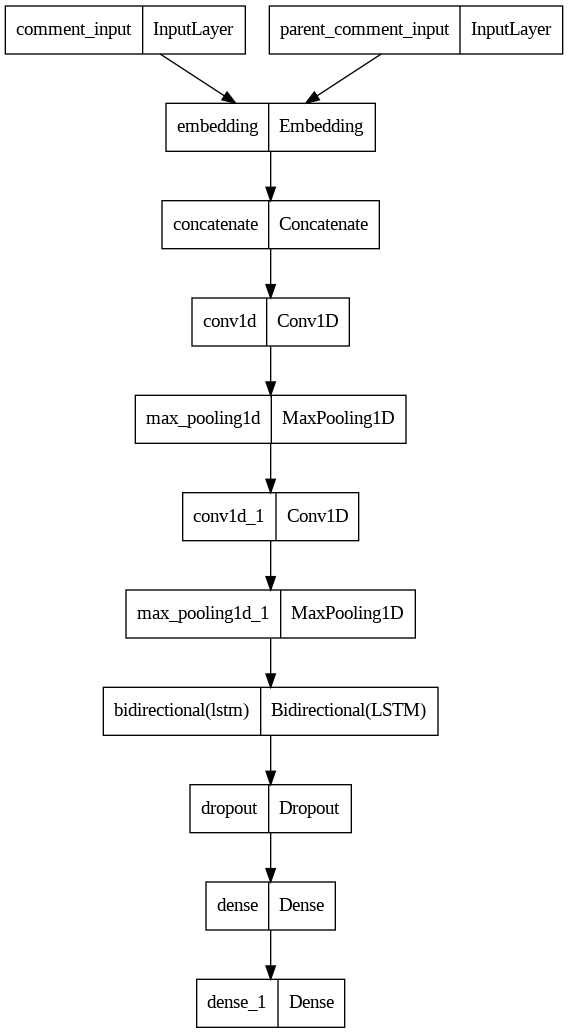

In [ ]:
plot_model(CNN_Text_BiLSTM)

Best Accuracy so Far

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model

predictions = CNN_Text_BiLSTM .predict({'comment_input': X_text_comment_pad_test,
                             'parent_comment_input': X_text_parent_comment_pad_test})

prediction_result = (predictions > 0.5).astype('int32')

accuracy = accuracy_score(y_test, prediction_result)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_test, prediction_result)
print('Precision: %f' % precision)


recall = recall_score(y_test, prediction_result)
print('Recall: %f' % recall)


f1 = f1_score(y_test, prediction_result)
print('F1 score: %f' % f1)


predictions = predictions.flatten()
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)

5054/5054 [==============================] - 18s 3ms/step
Accuracy: 0.726720
Precision: 0.769672
Recall: 0.649237
F1 score: 0.704343
ROC AUC: 0.803069


#CNN with BiLSTM Text and Non-Text - Attention Mechanism added for numeric data

In [ ]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout, Bidirectional, LSTM, Permute, Multiply, Lambda, RepeatVector
from keras.models import Model
from keras import optimizers, backend as K
from keras_tuner import HyperModel

def build_model5(hp):
    comment_input = Input(shape=(max_seq_length,), name='comment_input')
    parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')
    numeric_input = Input(shape=(X_numeric_scaled.shape[1],), name='numeric_input')

    embedding_layer = Embedding(input_dim=max_words,
                                output_dim=150,
                                weights=[embedding_matrix],
                                input_length=max_seq_length,
                                trainable=True)

    comment_embedding = embedding_layer(comment_input)
    parent_comment_embedding = embedding_layer(parent_comment_input)

    concatenated_embeddings = concatenate([comment_embedding, parent_comment_embedding], axis=1)

    conv1 = Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Choice('conv1_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(concatenated_embeddings)
    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = Dropout(hp.Float('dropout_conv1', min_value=0.0, max_value=0.5, step=0.1))(conv1)

    conv2 = Conv1D(filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Choice('conv2_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(conv1)
    conv2 = MaxPooling1D(pool_size=2)(conv2)
    conv2 = Dropout(hp.Float('dropout_conv2', min_value=0.0, max_value=0.5, step=0.1))(conv2)

    bi_lstm = Bidirectional(LSTM(hp.Int('lstm_units', min_value=64, max_value=256, step=64)))(conv2)
    bi_lstm = Dropout(hp.Float('dropout_lstm', min_value=0.0, max_value=0.5, step=0.1))(bi_lstm)

    # Attention mechanism for numeric input
    attention_probs = Dense(1, activation='softmax', name='attention_vec')(numeric_input)
    attention_mul = Multiply()([bi_lstm, attention_probs])

    # Combine the attention output with the original bi-LSTM output
    combined_features = concatenate([attention_mul, bi_lstm])

    dense = Dense(hp.Int('dense_units', min_value=64, max_value=256, step=32), activation='relu')(combined_features)
    dense = Dropout(hp.Float('dropout_dense', min_value=0.0, max_value=0.5, step=0.1))(dense)

    output = Dense(1, activation='sigmoid')(dense)

    model5 = Model(inputs=[comment_input, parent_comment_input, numeric_input], outputs=output)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model5.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model5


In [ ]:
from kerastuner.tuners import RandomSearch

tuner5 = RandomSearch(
    build_model5,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hparam_tuning5'
)

tuner5.search_space_summary()

tuner5.search(x=[X_text_comment_pad, X_text_parent_comment_pad, X_numeric_scaled],
             y=y_train,
             epochs=4,
             batch_size=128,
             validation_split=0.10)



CNN_Text_NonText_Attention = tuner5.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 07m 47s]
val_accuracy: 0.5025351643562317

Best val_accuracy So Far: 0.7273148894309998
Total elapsed time: 00h 32m 43s


In [ ]:
# CNN_Text_NonText_Attention.save('/content/drive/MyDrive/Sarcasm_Data/CNN_Text_NonText_Attention.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
CNN_Text_NonText_Attention = load_model('/content/drive/MyDrive/Sarcasm_Data/CNN_Text_NonText_Attention.h5')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model

predictions = CNN_Text_NonText_Attention.predict({'comment_input': X_text_comment_pad_test,
                             'parent_comment_input': X_text_parent_comment_pad_test,
                              'numeric_input': X_numeric_scaled_test})

prediction_result = (predictions > 0.5).astype('int32')

accuracy = accuracy_score(y_test, prediction_result)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_test, prediction_result)
print('Precision: %f' % precision)


recall = recall_score(y_test, prediction_result)
print('Recall: %f' % recall)


f1 = f1_score(y_test, prediction_result)
print('F1 score: %f' % f1)


predictions = predictions.flatten()
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)

5054/5054 [==============================] - 19s 4ms/step
Accuracy: 0.726392
Precision: 0.723745
Recall: 0.734751
F1 score: 0.729207
ROC AUC: 0.805680


# Adding Attention Mechanism For Text as Well

In [ ]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout, Bidirectional, LSTM, Permute, Multiply, Lambda, RepeatVector, Activation
from keras.models import Model
from keras import optimizers, backend as K

def build_model6(hp):
    comment_input = Input(shape=(max_seq_length,), name='comment_input')
    parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')
    numeric_input = Input(shape=(X_numeric_scaled.shape[1],), name='numeric_input')

    embedding_layer = Embedding(input_dim=max_words,
                                output_dim=150,
                                weights=[embedding_matrix],
                                input_length=max_seq_length,
                                trainable=True)

    comment_embedding = embedding_layer(comment_input)
    parent_comment_embedding = embedding_layer(parent_comment_input)

    concatenated_embeddings = concatenate([comment_embedding, parent_comment_embedding], axis=1)

    conv1 = Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Choice('conv1_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(concatenated_embeddings)
    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = Dropout(hp.Float('dropout_conv1', min_value=0.0, max_value=0.5, step=0.1))(conv1)

    conv2 = Conv1D(filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Choice('conv2_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(conv1)
    conv2 = MaxPooling1D(pool_size=2)(conv2)
    conv2 = Dropout(hp.Float('dropout_conv2', min_value=0.0, max_value=0.5, step=0.1))(conv2)

    bi_lstm = Bidirectional(LSTM(hp.Int('lstm_units', min_value=64, max_value=256, step=64), return_sequences=True))(conv2)
    bi_lstm = Dropout(hp.Float('dropout_lstm', min_value=0.0, max_value=0.5, step=0.1))(bi_lstm)

    # Attention layer for text data
    text_attention = Dense(1, activation='tanh')(bi_lstm)
    text_attention = Flatten()(text_attention)
    text_attention = Activation('softmax')(text_attention)
    text_attention = RepeatVector(hp.Int('lstm_units', min_value=64, max_value=256, step=64) * 2)(text_attention)
    text_attention = Permute([2, 1])(text_attention)
    text_attended = Multiply()([bi_lstm, text_attention])

    # Attention mechanism for numeric input
    numeric_attention_probs = Dense(1, activation='softmax', name='attention_vec')(numeric_input)
    attention_mul = Multiply()([text_attended, numeric_attention_probs])

    combined_features = concatenate([attention_mul, text_attended])

    dense = Dense(hp.Int('dense_units', min_value=64, max_value=256, step=32), activation='relu')(combined_features)
    dense = Dropout(hp.Float('dropout_dense', min_value=0.0, max_value=0.5, step=0.1))(dense)

    output = Dense(1, activation='sigmoid')(dense)

    model6 = Model(inputs=[comment_input, parent_comment_input, numeric_input], outputs=output)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model6.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model6


In [ ]:
from kerastuner.tuners import RandomSearch

tuner6 = RandomSearch(
    build_model6,
    objective='val_accuracy',
    max_trials=7,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hparam_tuning6'
)

tuner6.search_space_summary()

tuner6.search(x=[X_text_comment_pad, X_text_parent_comment_pad, X_numeric_scaled],
             y=y_train,
             epochs=4,
             batch_size=128,
             validation_split=0.10)



CNN_Text_NonText_Attention2 = tuner5.get_best_models(num_models=1)[0]

Trial 7 Complete [00h 06m 42s]
val_accuracy: 0.7179933786392212

Best val_accuracy So Far: 0.7276267409324646
Total elapsed time: 00h 52m 58s


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model

predictions2 = CNN_Text_NonText_Attention2.predict({'comment_input': X_text_comment_pad_test,
                             'parent_comment_input': X_text_parent_comment_pad_test,
                              'numeric_input': X_numeric_scaled_test})

prediction_result = (predictions2 > 0.5).astype('int32')

accuracy = accuracy_score(y_test, prediction_result)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_test, prediction_result)
print('Precision: %f' % precision)


recall = recall_score(y_test, prediction_result)
print('Recall: %f' % recall)


f1 = f1_score(y_test, prediction_result)
print('F1 score: %f' % f1)


predictions = predictions.flatten()
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)

5054/5054 [==============================] - 19s 4ms/step
Accuracy: 0.726392
Precision: 0.723745
Recall: 0.734751
F1 score: 0.729207
ROC AUC: 0.805680


# BERT

In [39]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
tokenizer = BertTokenizer.from_pretrained('google/bert_uncased_L-2_H-128_A-2')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--google--bert_uncased_L-2_H-128_A-2/snapshots/30b0a37ccaaa32f332884b96992754e246e48c5f/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading file tokenizer.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--bert_uncased_L-2_H-128_A-2/snapshots/30b0a37ccaaa32f332884b96992754e246e48c5f/config.json
Model config BertConfig {
  "_name_or_path": "google/bert_uncased_L-2_H-128_A-2",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 128,
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 2,
  "num_hidden_layers": 2,
  "pad_token

In [10]:
# def batch_tokenize(tokenizer, texts, batch_size=1000):
#     tokenized_outputs = []
#     for i in range(0, len(texts), batch_size):
#         batch = texts[i:i+batch_size]
#         tokenized_outputs.extend(tokenizer(batch, truncation=True, padding=True, return_tensors="pt"))
#     return tokenized_outputs

In [41]:
import pandas as pd

# Assuming X_train and y_train are loaded from a CSV or another data source
# Make sure the indices are continuous and start from 0
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_eval = X_eval.reset_index(drop=True)
y_eval = y_eval.reset_index(drop=True)

In [43]:
# Tokenize the data
max_length = 500
train_encodings = tokenizer(
    X_train['comment'].tolist(),
    truncation=True,
    padding="max_length",
    max_length=max_length,
    return_tensors="pt"
)

test_encodings = tokenizer(
    X_test['comment'].tolist(),
    truncation=True,
    padding="max_length",
    max_length=max_length,
    return_tensors="pt"
)


In [44]:
from torch.utils.data import Dataset, DataLoader
import torch
class SarcasmDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)




In [45]:
train_dataset = SarcasmDataset(train_encodings, y_train)
eval_dataset = SarcasmDataset(test_encodings, y_test)

In [46]:
# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('google/bert_uncased_L-2_H-128_A-2')

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--bert_uncased_L-2_H-128_A-2/snapshots/30b0a37ccaaa32f332884b96992754e246e48c5f/config.json
Model config BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 128,
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 2,
  "num_hidden_layers": 2,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--google--bert_uncased_L-2_H-128_A-2/snapshots/30b0a37ccaaa32f332884b96992754e246e48c5f/model.safetensors
Some weights of the model checkpoint at google/bert_uncased_L-2_H-128_A-2 were not 

In [47]:
# Fine-tuning only the last layer
for param in model.bert.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True

In [17]:
pip install transformers[torch]

In [48]:
import torch

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move your model to the specified device
model.to(device)


Using device: cuda


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-12, e

In [22]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00


In [51]:
from datasets import load_metric
import numpy as np

# Load the accuracy metric
accuracy_metric = load_metric("accuracy")
# Define the compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    return {"accuracy": accuracy["accuracy"]}

/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [52]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    learning_rate=3e-4,
    logging_dir='./logs',
    logging_steps=50,
    log_level='info',
    load_best_model_at_end=True,
    evaluation_strategy='steps',
    eval_steps=50,
    save_strategy='steps',
    report_to="all"
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

PyTorch: setting up devices
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
***** Running training *****
  Num examples = 646,894
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 80,862
  Number of trainable parameters = 258


Step,Training Loss,Validation Loss,Accuracy
50,0.695000,0.695818,0.474954
100,0.693900,0.695578,0.474475


***** Running Evaluation *****
  Num examples = 646894
  Batch size = 8
***** Running Evaluation *****
  Num examples = 646894
  Batch size = 8
***** Running Evaluation *****
  Num examples = 646894
  Batch size = 8


KeyboardInterrupt: 

In [ ]:
import accelerate
print(accelerate.__version__)
